<a href="https://colab.research.google.com/github/baileyhsu0631/amazon_recommender/blob/main/Amazon_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this notebook, I am trying to practice some recommender algorithms on the Amazon review Dataset.**

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [4]:
from datasets import load_dataset

dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(dataset["full"][0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


In [ ]:
# load it into a pandas dataframe

In [1]:
import pandas as pd

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.DataFrame(dataset['full'])

In [13]:
df.to_parquet('/content/drive/MyDrive/parquet/temporary_parquet.parquet')

In [3]:
df = pd.read_parquet('/content/drive/MyDrive/parquet/temporary_parquet.parquet')

In [15]:
df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [ ]:
# EDA here and checking data

In [4]:
# Display basic information
df.info()

# Handle missing values
df.dropna(inplace=True)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [5]:
df = df.drop('images', axis=1)

Field 	Type 	Explanation

rating 	float 	Rating of the product (from 1.0 to 5.0).

title 	str 	Title of the user review.

text 	str 	Text body of the user review.

images 	list 	Images that users post after they have
received the product. Each image has different sizes (small, medium, large), represented by the small_image_url, medium_image_url, and large_image_url respectively.

asin 	str 	ID of the product.

parent_asin 	str 	Parent ID of the product. Note: Products with different colors, styles, sizes usually belong to the same parent ID. The “asin” in previous Amazon datasets is actually parent ID. Please use parent ID to find product meta.

user_id 	str 	ID of the reviewer

timestamp 	int 	Time of the review (unix time)

verified_purchase 	bool 	User purchase verification

helpful_vote 	int 	Helpful votes of the review

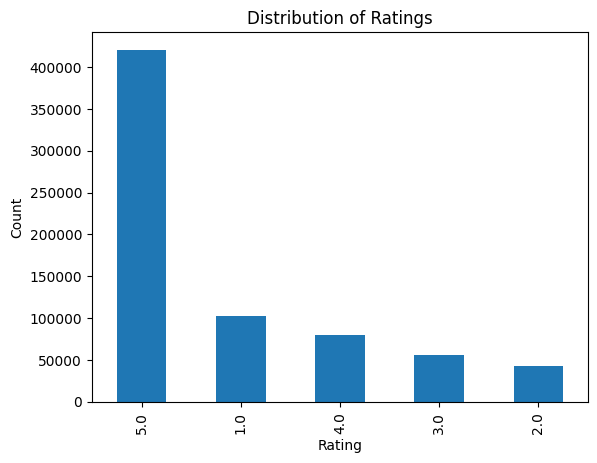

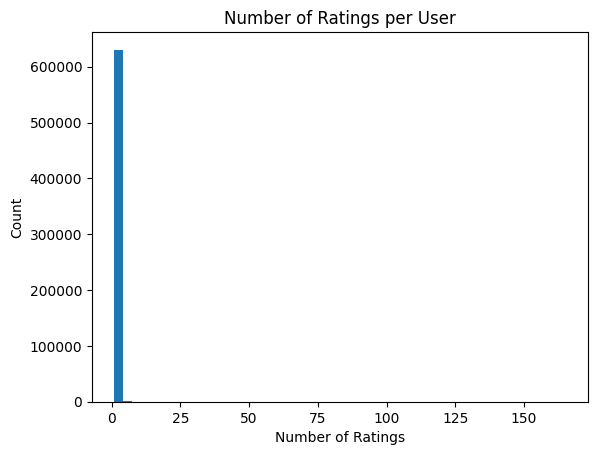

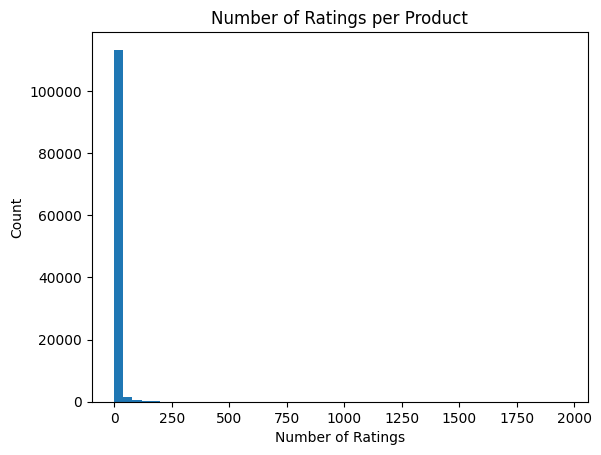

In [ ]:
import matplotlib.pyplot as plt

# Distribution of ratings
df['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Number of ratings per user
user_ratings = df.groupby('user_id').size()
user_ratings.plot(kind='hist', bins=50)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

# Number of ratings per product
product_ratings = df.groupby('asin').size()
product_ratings.plot(kind='hist', bins=50)
plt.title('Number of Ratings per Product')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

3. Building the Recommender System
a. Choosing the Recommendation Algorithm

There are several types of recommendation algorithms:

    Collaborative Filtering: Uses user-item interactions.
        User-based Collaborative Filtering: Recommends items based on similar users.
        Item-based Collaborative Filtering: Recommends items similar to those the user liked.
    Matrix Factorization: Techniques like SVD (Singular Value Decomposition) or Alternating Least Squares (ALS).
    Content-based Filtering: Uses item features for recommendations.
    Hybrid Methods: Combines multiple techniques.

b. Collaborative Filtering with Matrix Factorization

Let's use Singular Value Decomposition (SVD) from the Surprise library as an example.


In [18]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357240 sha256=cd044f7684c0bbe6a0cad44a82df7fe4a147a8d2e75b21c70ac23b48de0b07a6
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [8]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Load data into Surprise format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)

# Build and evaluate the SVD model
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4076  1.4060  1.4070  1.4051  1.4075  1.4067  0.0010  
MAE (testset)     1.1473  1.1482  1.1477  1.1481  1.1499  1.1482  0.0009  
Fit time          18.86   20.60   19.25   18.90   18.43   19.21   0.74    
Test time         1.04    1.16    0.98    1.88    2.05    1.42    0.45    


{'test_rmse': array([1.40764638, 1.40601264, 1.40699926, 1.40509503, 1.40754722]),
 'test_mae': array([1.1473004 , 1.14818072, 1.14766171, 1.14806947, 1.14993385]),
 'fit_time': (18.860402822494507,
  20.602105617523193,
  19.248528480529785,
  18.90453553199768,
  18.43460750579834),
 'test_time': (1.0449464321136475,
  1.1563997268676758,
  0.9794101715087891,
  1.8813517093658447,
  2.047055244445801)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
# Predict a specific user-item rating
user_id = 'A2ZAN4PV9UY9RL'
product_id = 'B0002E2WEU'
pred = svd.predict(user_id, product_id)
print(pred)

user: A2ZAN4PV9UY9RL item: B0002E2WEU r_ui = None   est = 3.96   {'was_impossible': False}


In [6]:
# recommender.py

from surprise import KNNWithMeans
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)


In [9]:
df = df.sample(10000)

In [10]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)

In [11]:
trainset = data.build_full_trainset()

In [12]:
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [14]:
df

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
242044,5.0,Worth the purchase!,Super cute! It actually got delivered 2 weeks ...,B00ZUD4B5C,B00ZUD4B5C,AFZF46JMJTYHZTMKQHNKCUTXYTVA,1521995669694,0,True
349424,1.0,If you like throw your money,★ from Mike<br /><br />Puaggggg...if i cut my...,B071GM863F,B071GM863F,AHQIN4P64QRNSRQJMRWIFE4QSBSQ,1510678432671,2,True
255418,5.0,Good deal.,"Quick, good.",B01FIL4PJ2,B01FIL4PJ2,AFFT3WVKQBB5DM4RTQMMZCAYY2HA,1531669109745,0,True
504023,3.0,I love the product,Definitely a huge change coming from modern ma...,B0086I4YCS,B0086I4YCS,AEYN5UC6CRXAL22PF66TK45LT37A,1454019561000,3,True
38382,5.0,Great for dip mail powder,Use doing dip nails. Works great to remove exc...,B072KGXRV4,B072KGXRV4,AFHKVWUIC5GUS6HZXG7DP3MWH5MQ,1662359311466,0,True
...,...,...,...,...,...,...,...,...,...
605175,5.0,My hair has never felt softer!,I was in the market for a new shampoo and cond...,B075ZH5Z9F,B097BSKSQW,AGKJ536HOQQYT7ZOL2BFIAJOYGMA,1677528715384,2,True
246251,1.0,One Star,It is badly made. Very cheap will not stay tog...,B000WZNZAA,B000WZNZAA,AF4VMRV2WTQRCE7WQ3SDXVSFHBMQ,1411408647000,0,True
258725,5.0,Great!!!!!,Great ears. I put them on my 2 year old daught...,B084PB5HCM,B084PB5HCM,AETDMVTDZRCV4AXAFTMSPRKYF3YQ,1616209331906,0,True
93593,1.0,Nope nope nope,"Smells stale, like old clothes that have been ...",B077MKRMS4,B077MKRMS4,AFEICFOYV45F4F6SYWKO5GLXZSLQ,1650043768418,1,True


In [15]:
prediction = algo.predict('AFZF46JMJTYHZTMKQHNKCUTXYTVA', 'B00ZUD4B5C')

In [16]:
prediction.est

5

In [17]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [18]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV


param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])


1.4658370124617603
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [25]:
data = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)
trainset = data.build_full_trainset()
gs1 = SVD(n_epochs=10, lr_all=0.002, reg_all=0.4)

In [26]:
gs1.fit(trainset)

In [27]:
gs1.predict('AFZF46JMJTYHZTMKQHNKCUTXYTVA', 'B00ZUD4B5C')

Prediction(uid='AFZF46JMJTYHZTMKQHNKCUTXYTVA', iid='B00ZUD4B5C', r_ui=None, est=4.262536794760896, details={'was_impossible': False})